In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0932190801PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.836e-02 +/- 3.443e-03 (86.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-41
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 8721 sec
 Using fit statistic: chi
 Using Background File                P0932190801PNS003BGSPEC0001.FTZ
  Background Exposure Time: 8721 sec
 Using Response (RMF) File            epn_e3_ff20_sdY7.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0932190801PNS003SRCARF0001.FTZ



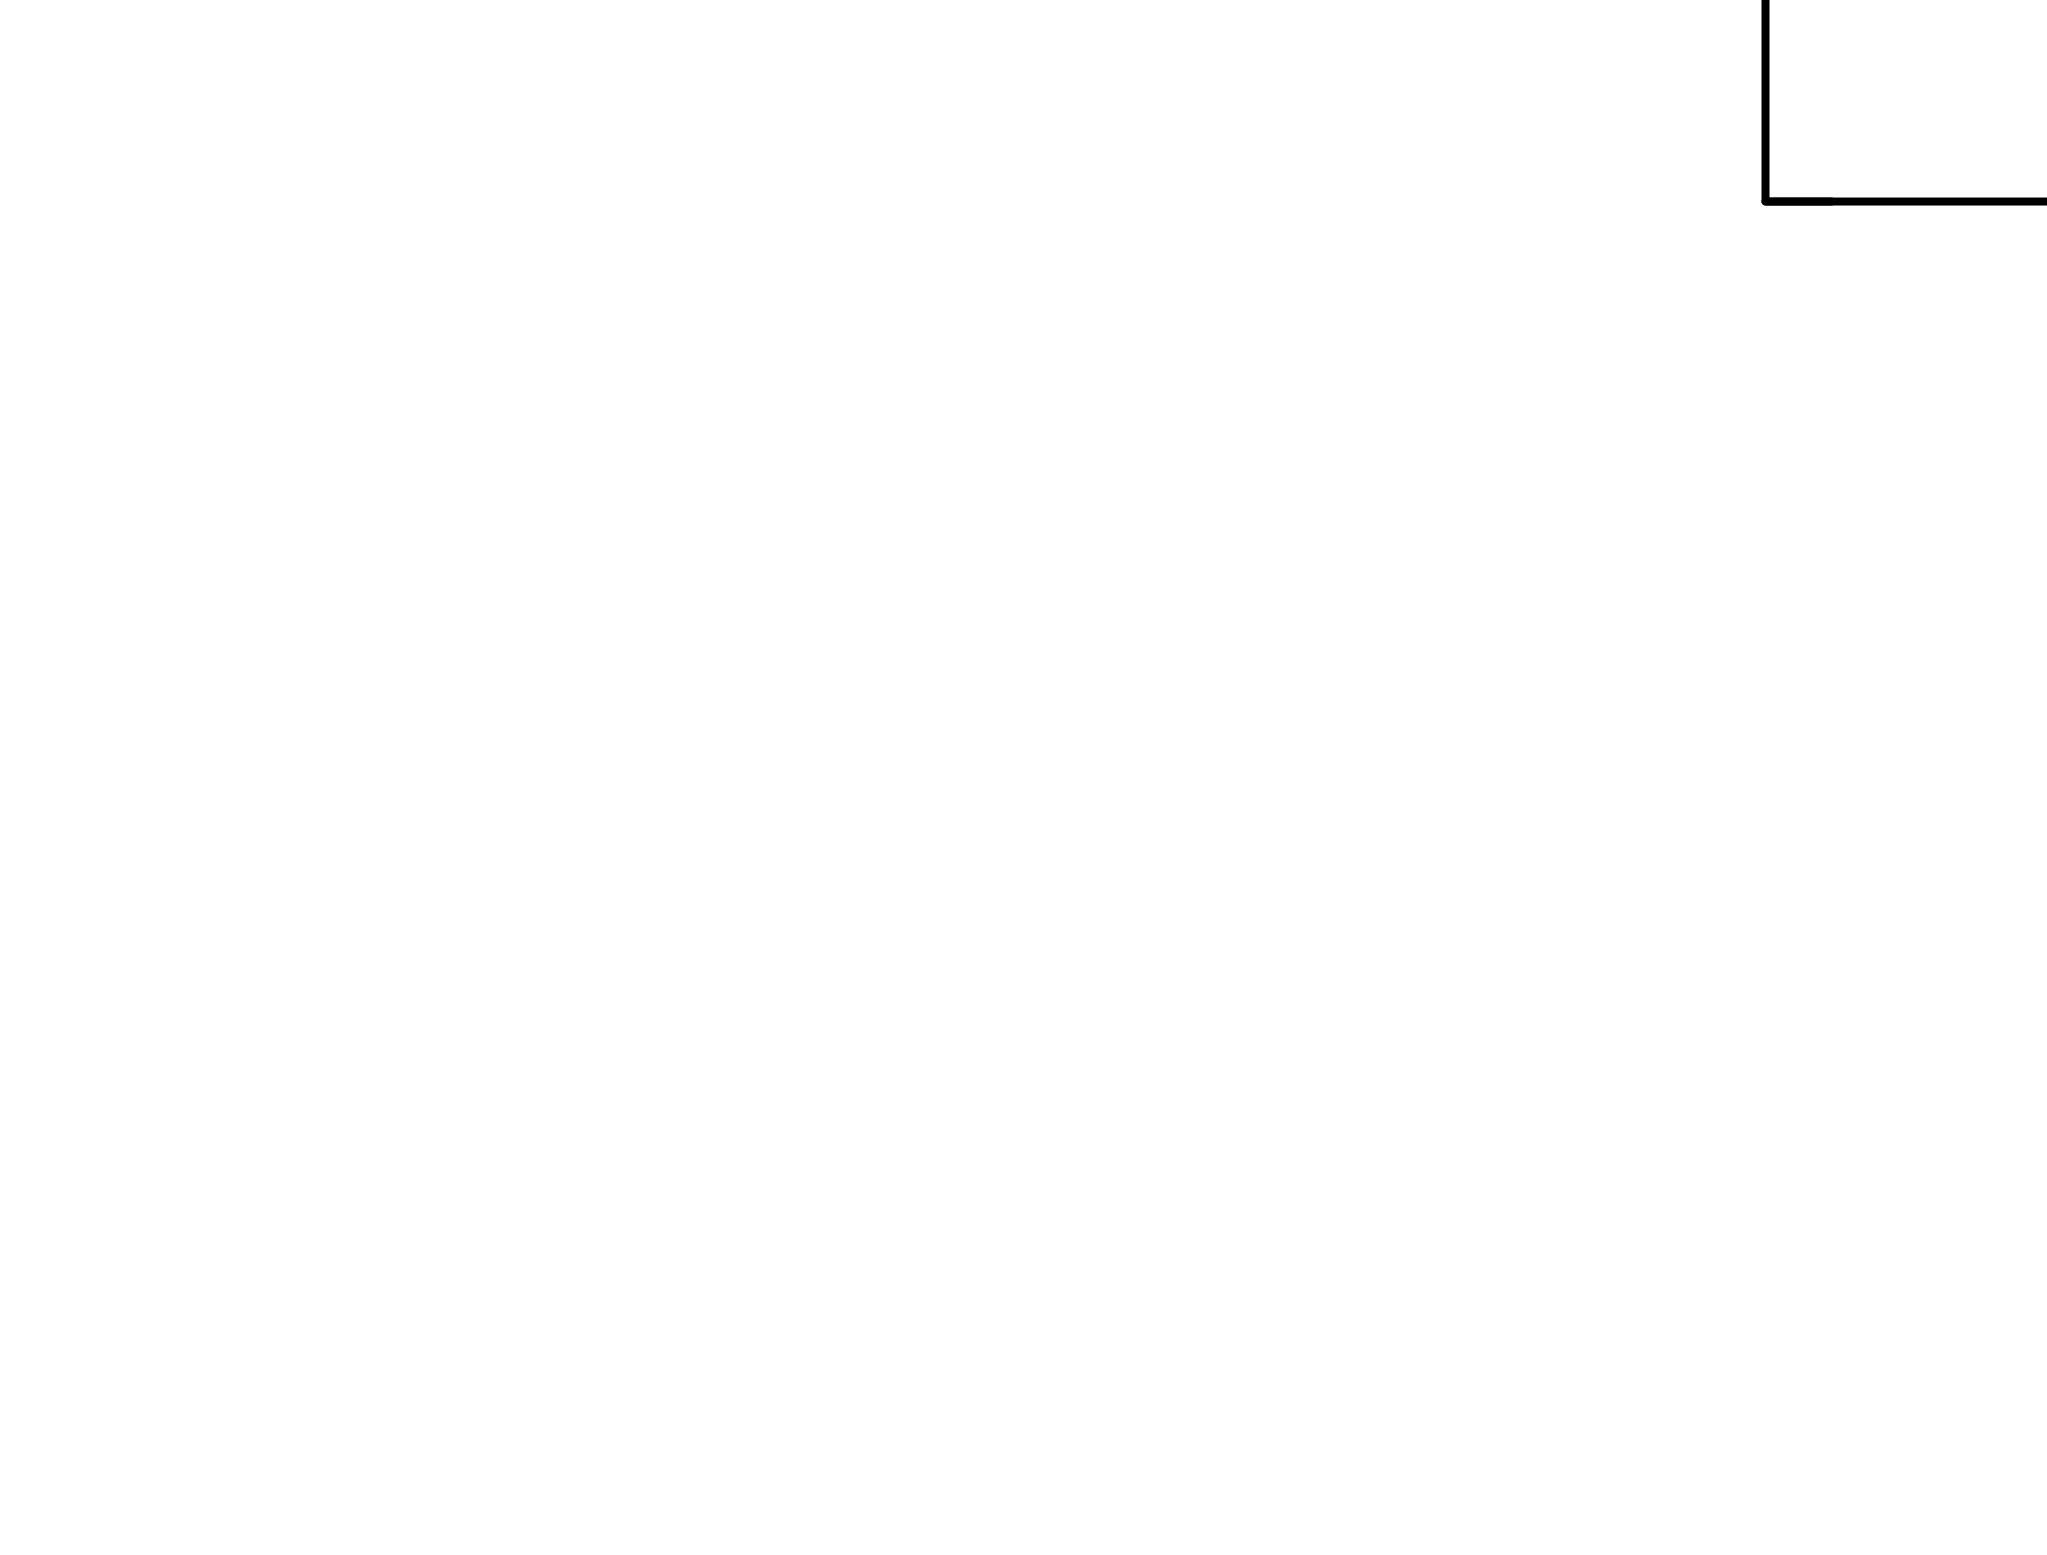

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0001 0.05")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (41) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

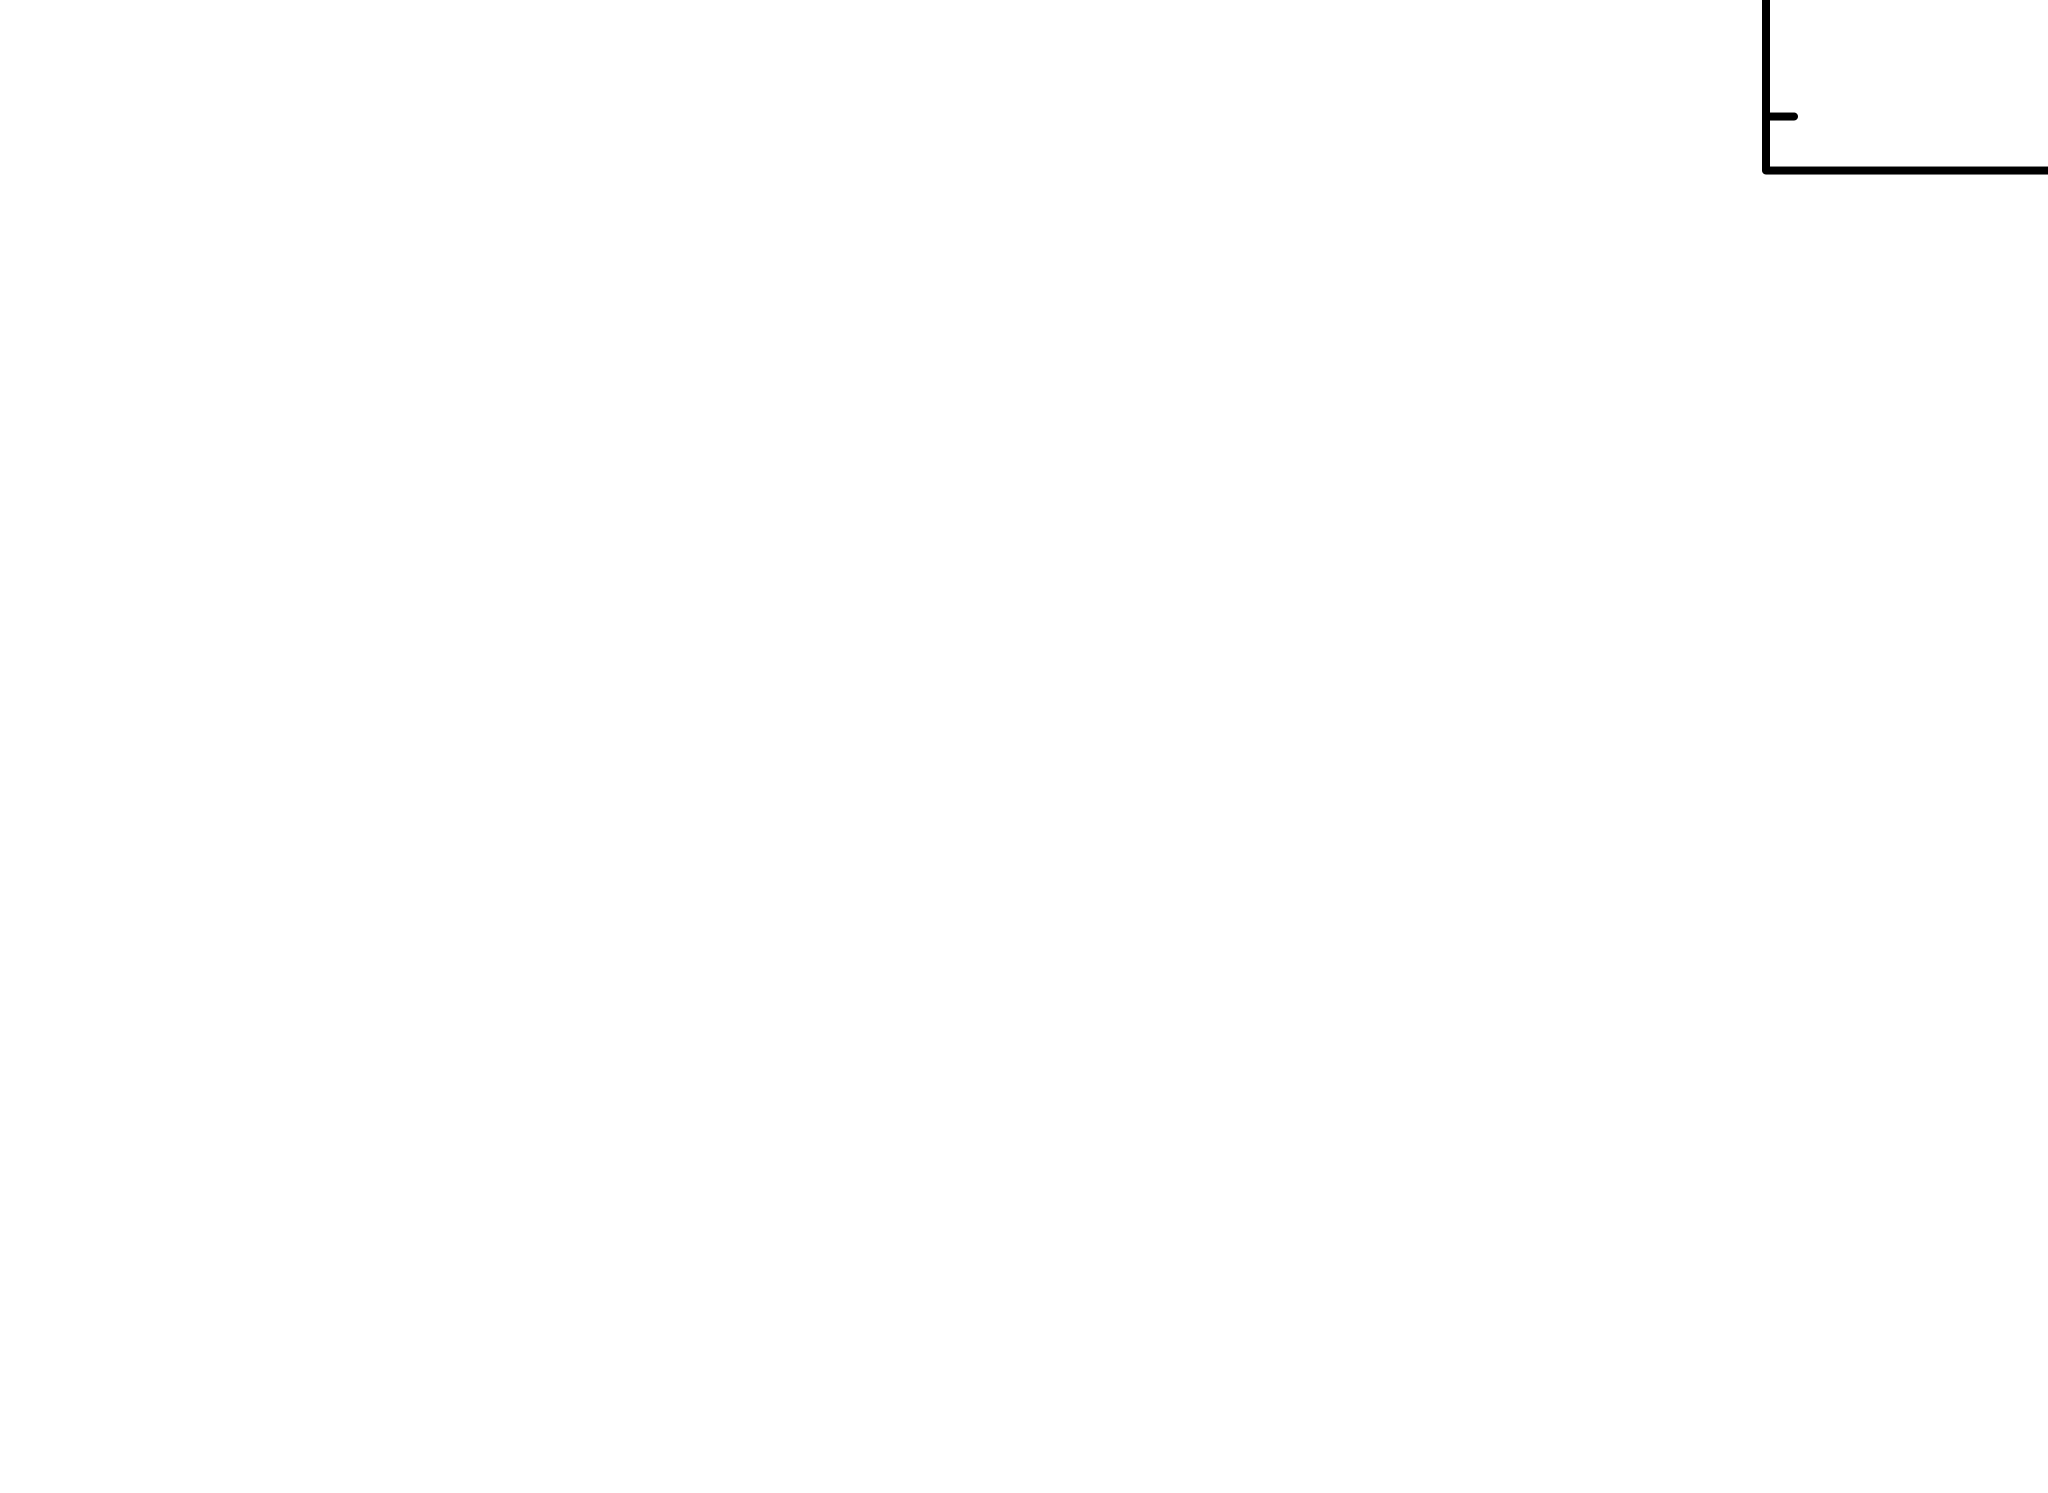

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.990583e+10     using 40 bins.

Test statistic : Chi-Squared              9.990583e+10     using 40 bins.
 Null hypothesis probability of 0.000000e+00 with 37 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
617.773      22.2367      -2      0.302932      -1.14881   4.29792e-07
408.558      2.69388e+07  -3       19.3341     -0.826079   6.60396e-06
379.974      5.6545e+06   -1      0.137323     -0.655261   9.07418e-0

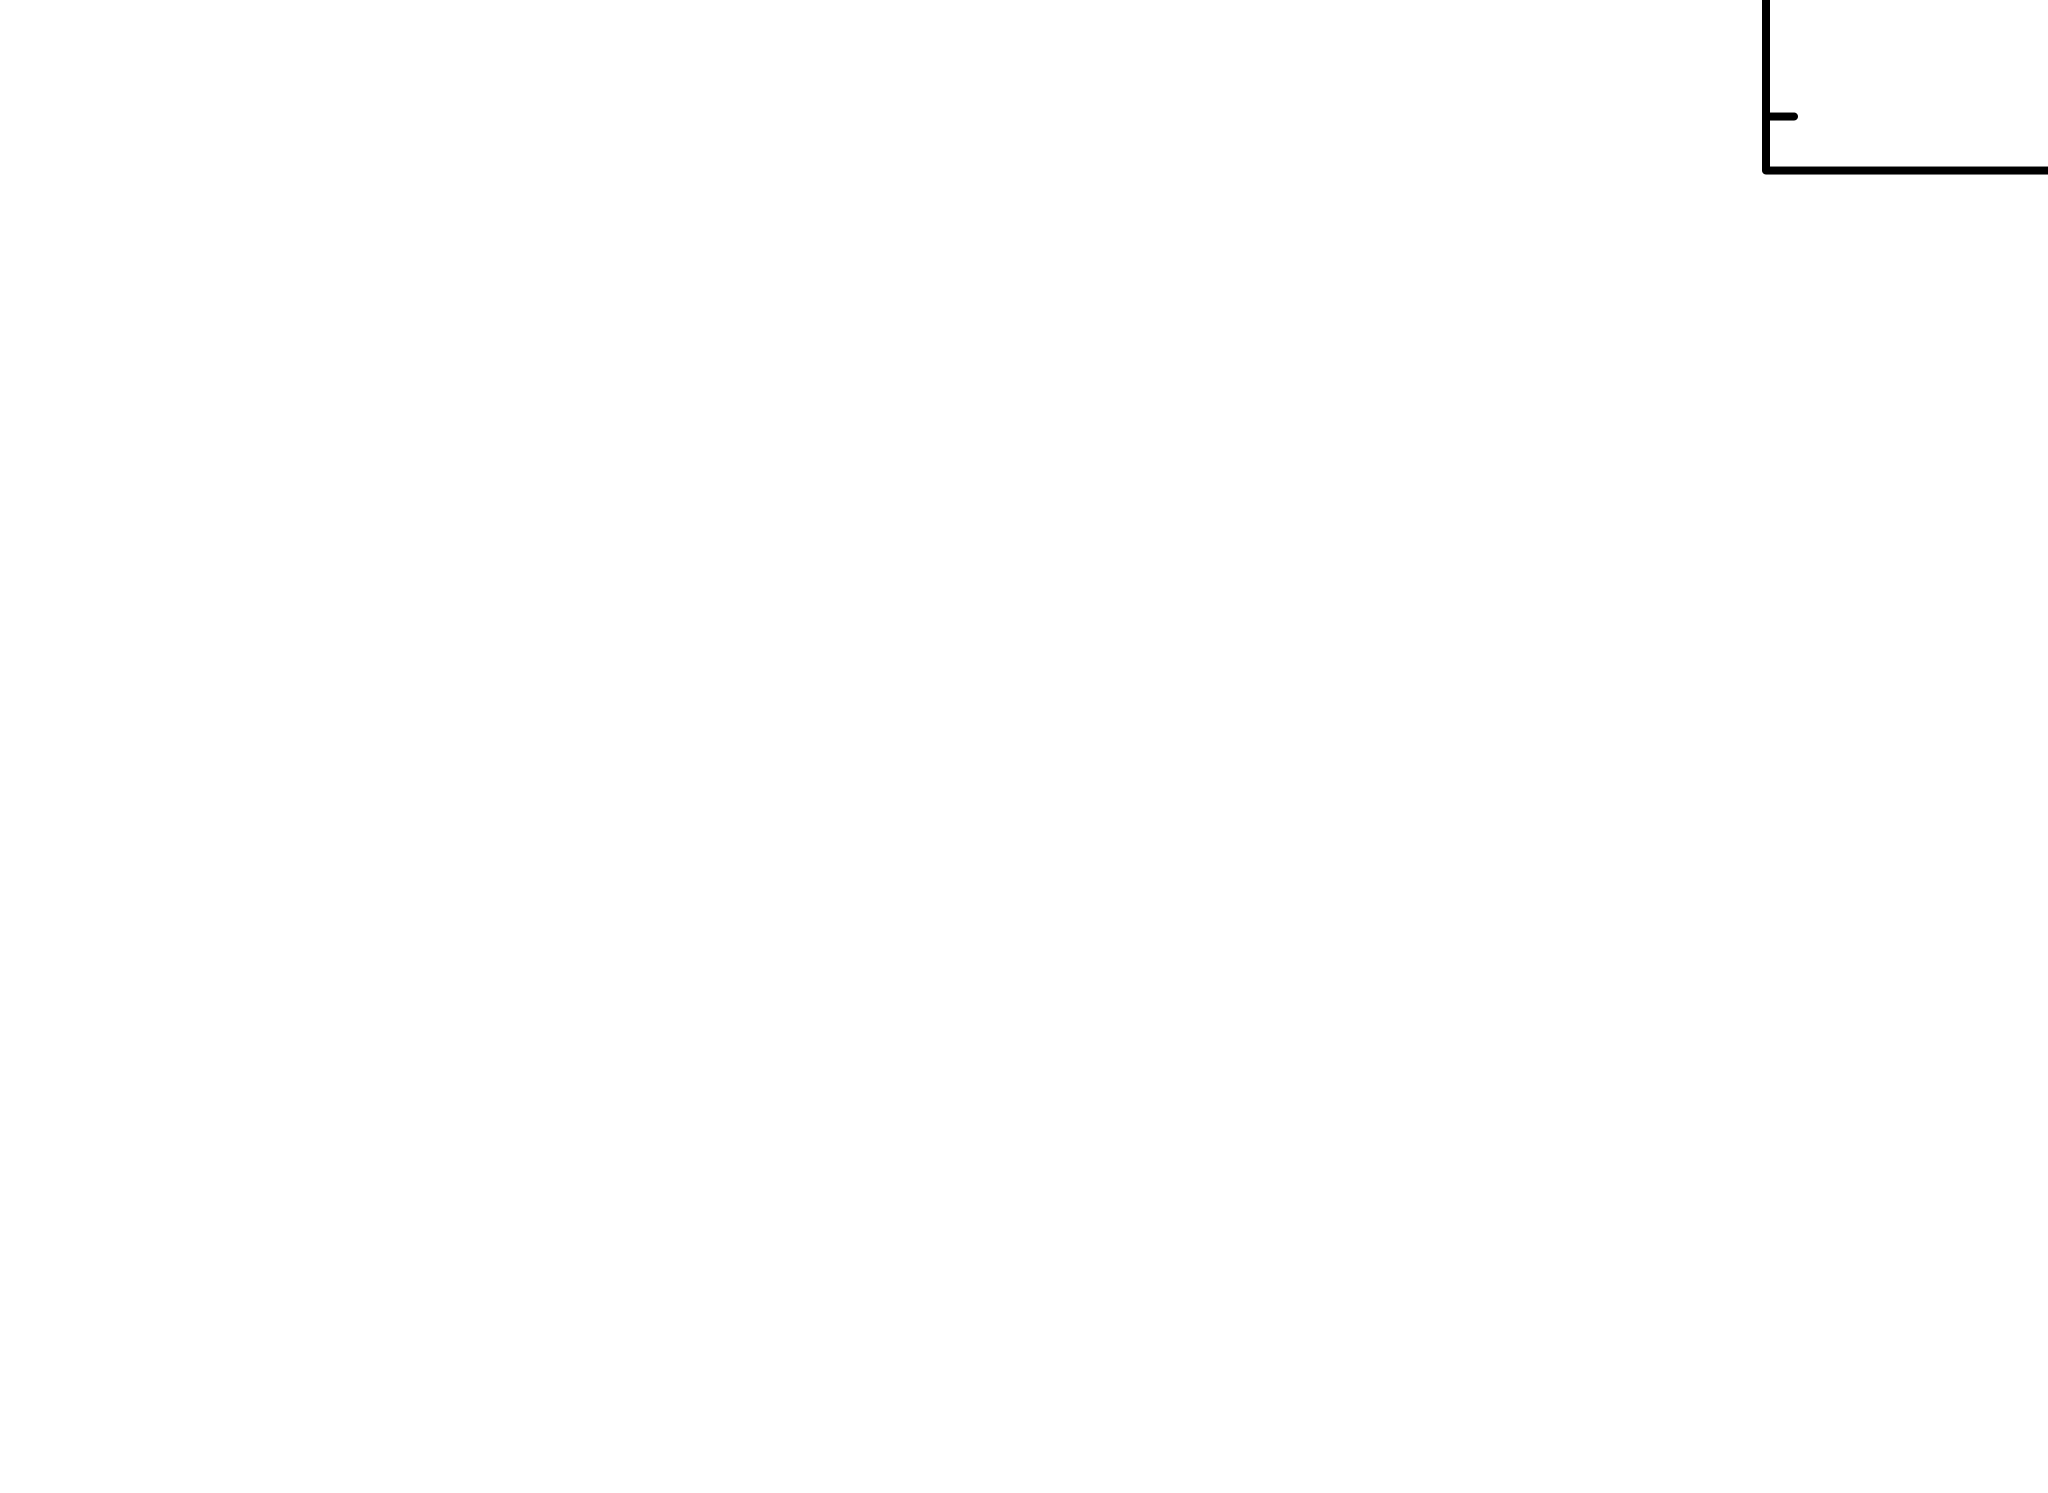

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

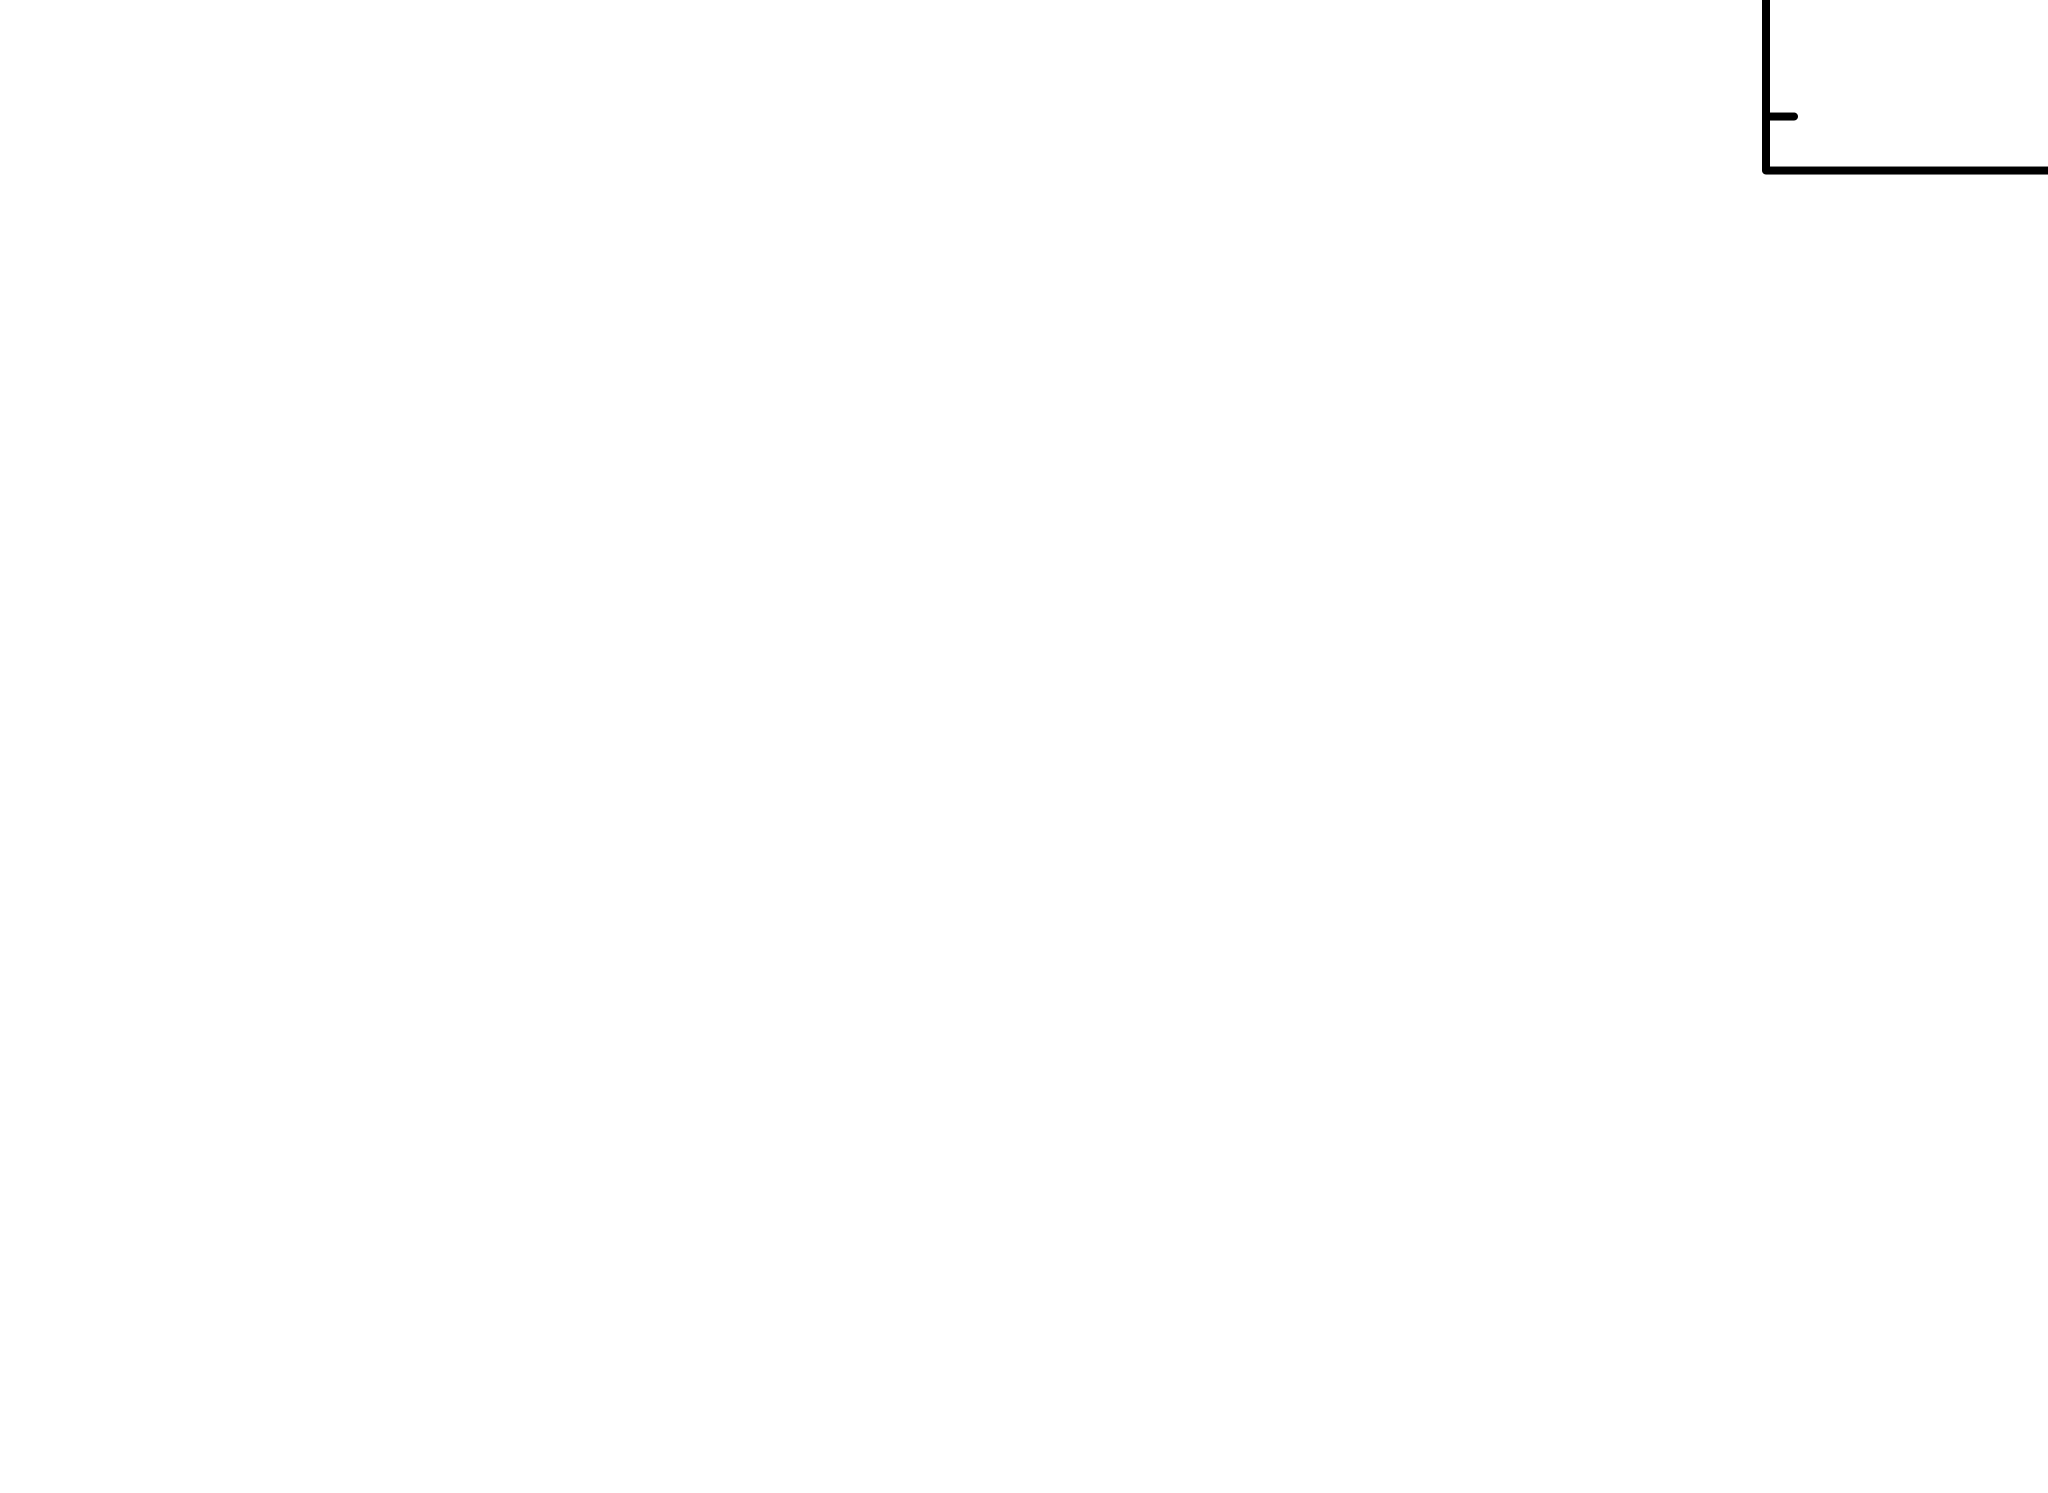


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.763527e+10     using 40 bins.

Test statistic : Chi-Squared              2.763527e+10     using 40 bins.
 Null hypothesis probability of 0.000000e+00 with 37 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
665.177      5.0864        0       1.44926       124.529   1.99034e-05
561.54       189777       -1       15.9309       41.9631   0.000186278
332.321      108462       -2       41.7911       157.338    0.00191691


In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.332825e+10     using 40 bins.

Test statistic : Chi-Squared              1.332825e+10     using 40 bins.
 Null hypothesis probability of 0.000000e+00 with 37 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
 Due to zero model norms, the following fit parameters are 

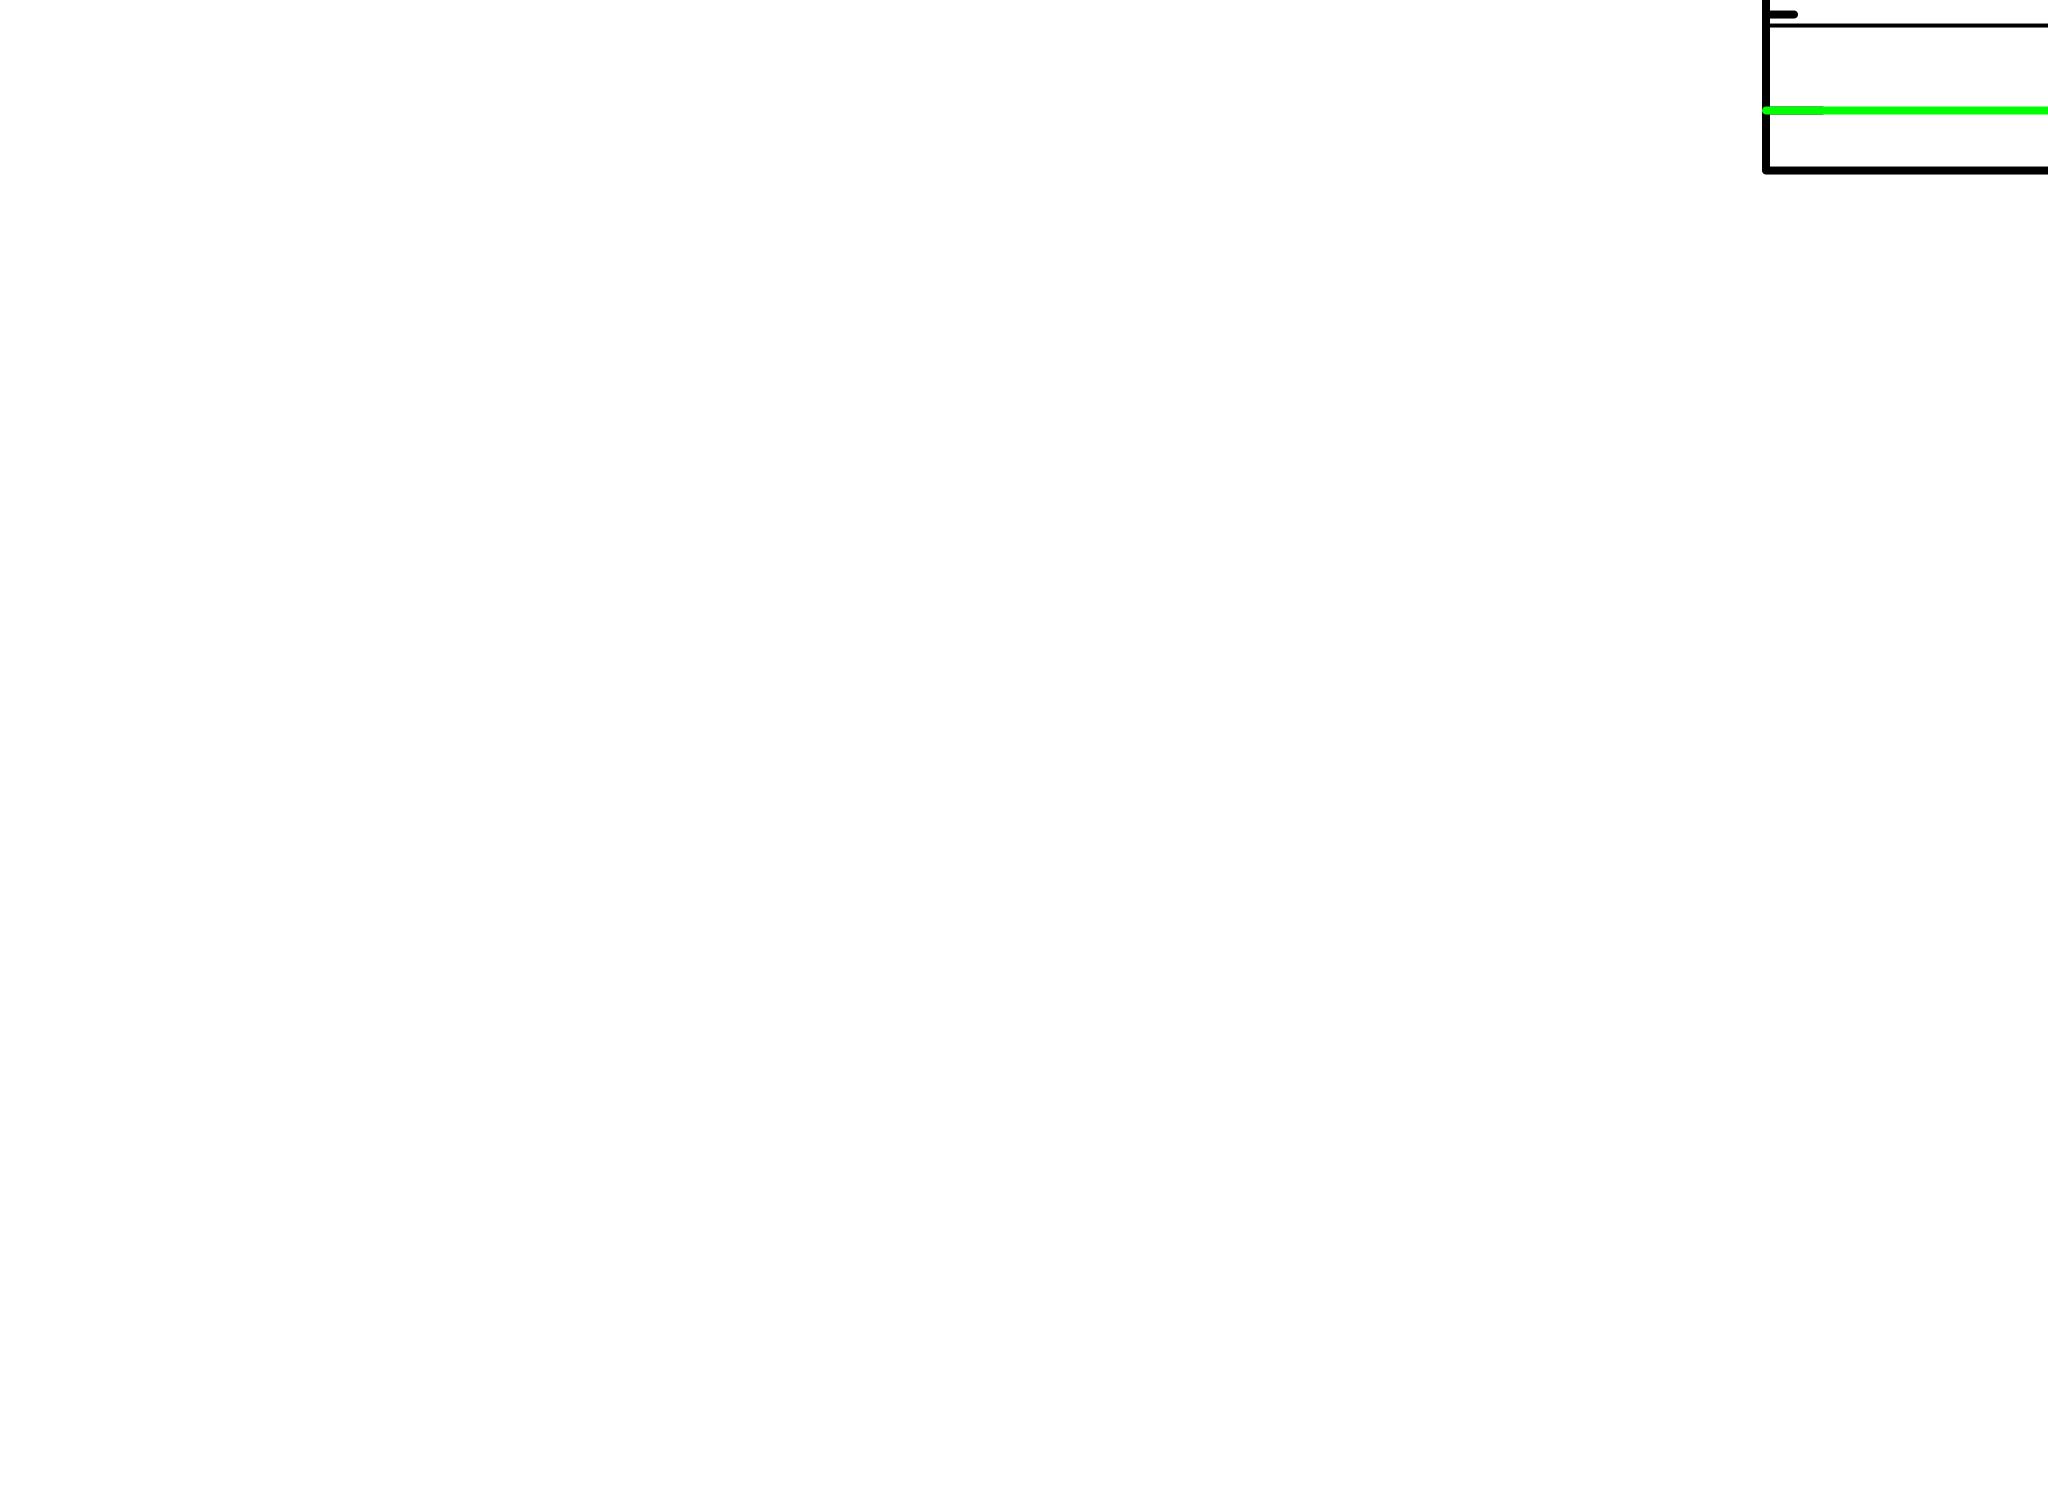

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

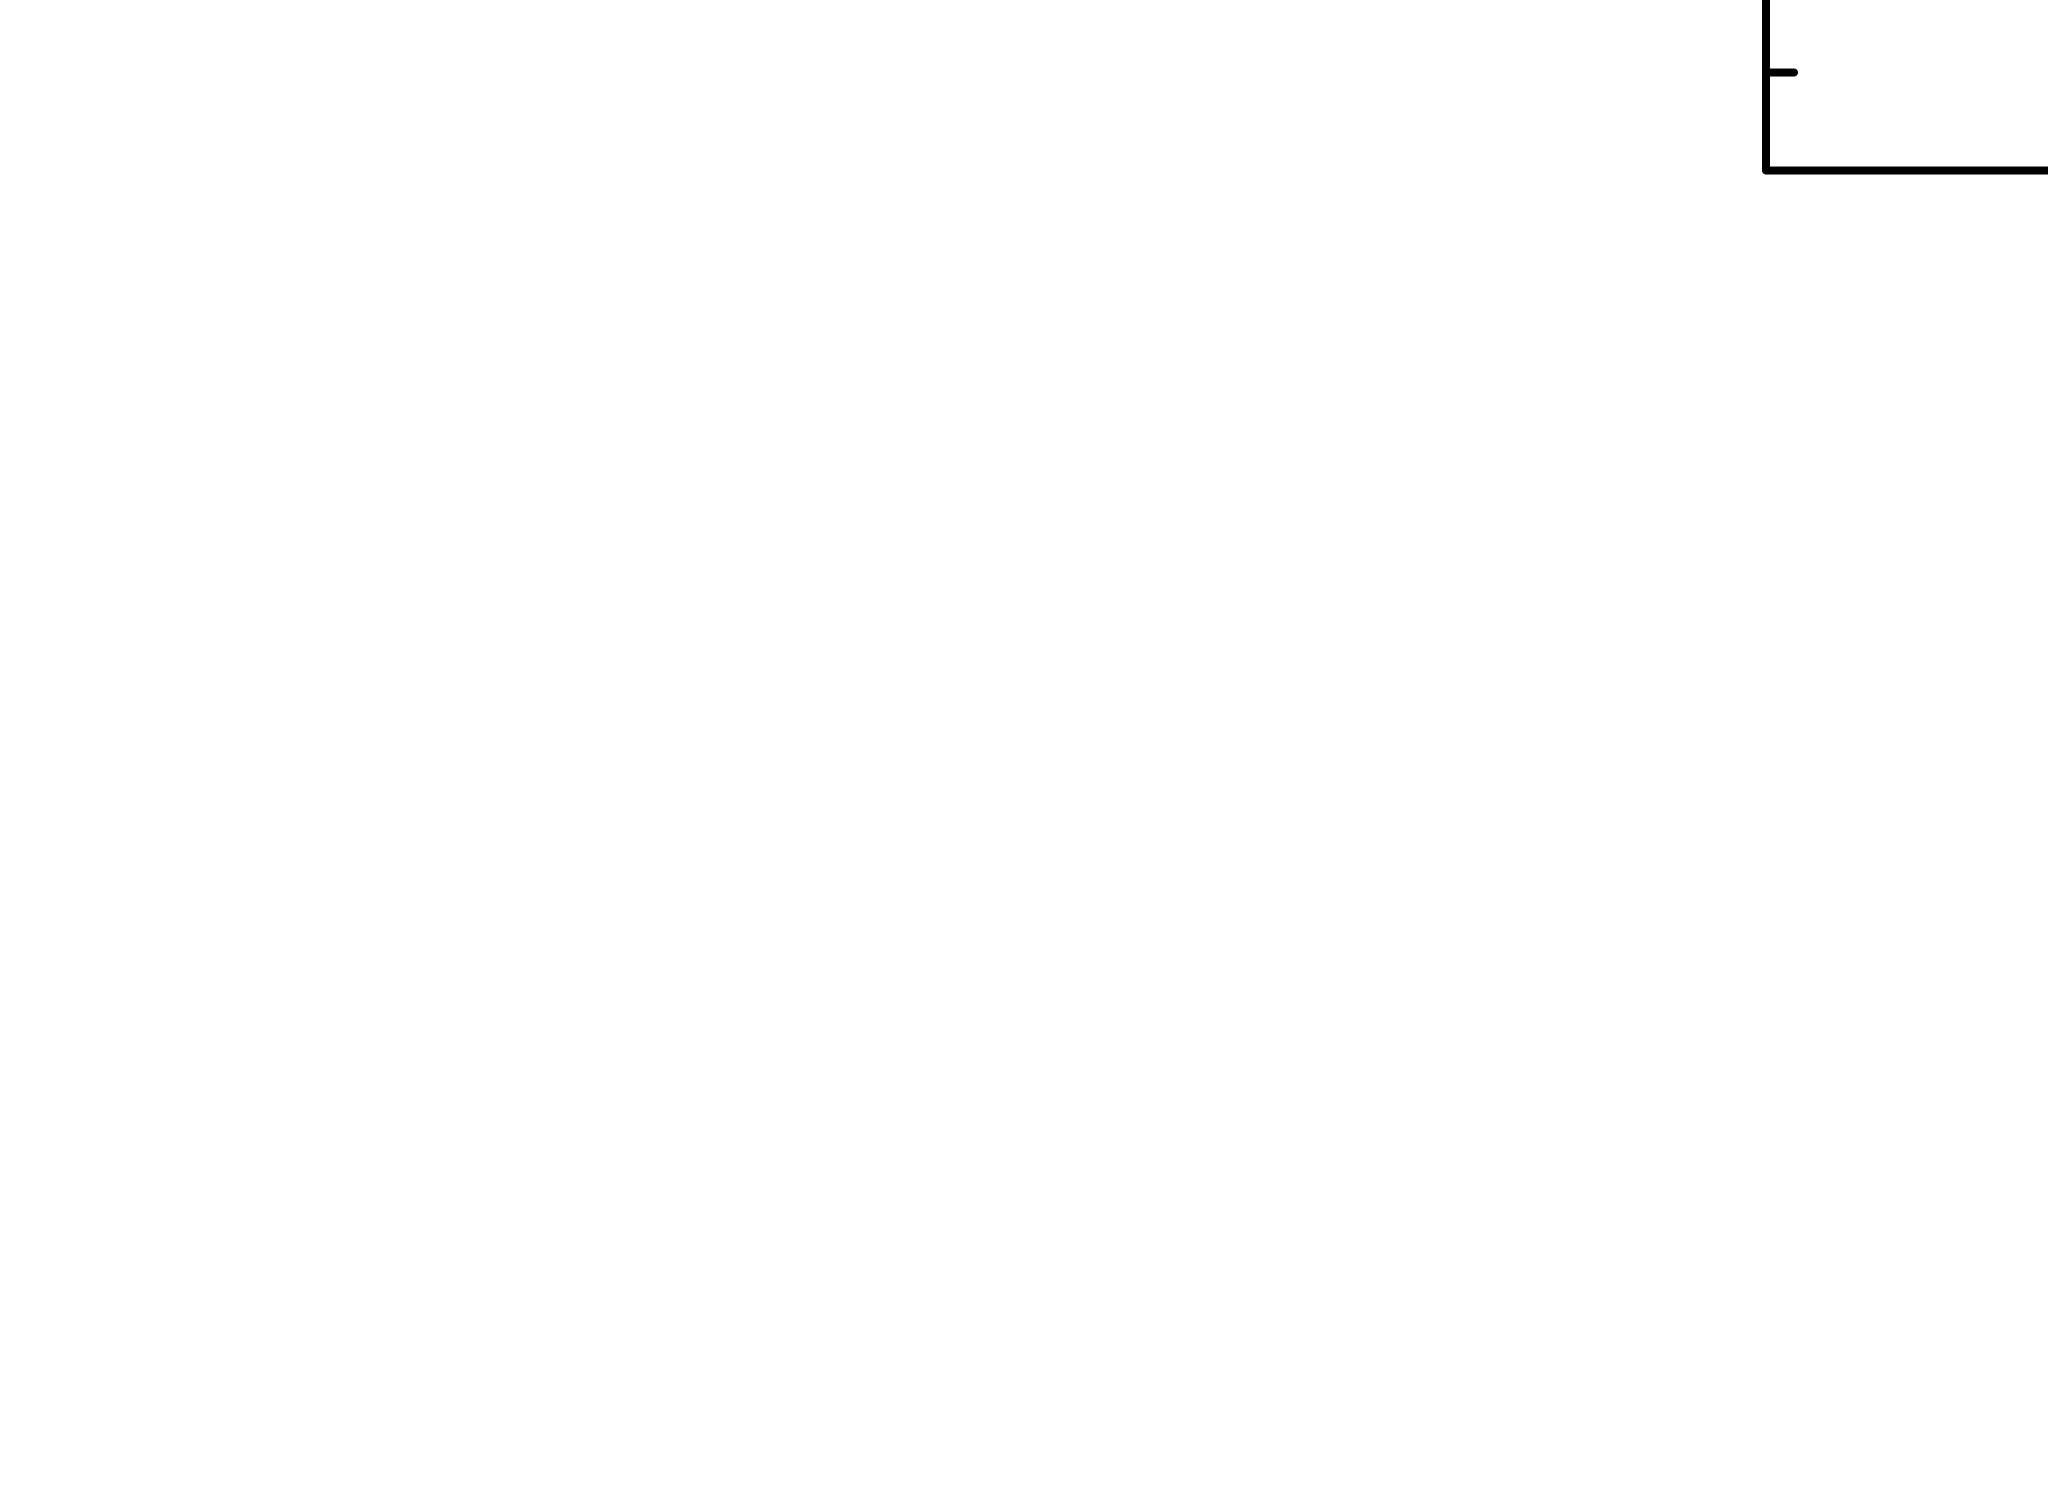

      No channels ignored (no channels in specified range)
     1 channels (41) ignored in spectrum #     1

Fit statistic  : Chi-Squared                690.3547     using 40 bins.

Test statistic : Chi-Squared                690.3547     using 40 bins.
 Null hypothesis probability of 2.2592e-121 with 37 degrees of freedom
 Current data and model not fit yet.


Model TBabs<1>(powerlaw<2> + bbody<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   bbody      kT         keV      3.00000      +/-  0.0          
   5    3   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.460771e+11     us

In [7]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*(powerlaw+bbody)")
Fit.perform()
Plot("data resid")

      No channels ignored (no channels in specified range)
     1 channels (41) ignored in spectrum #     1

Fit statistic  : Chi-Squared                 61.5093     using 40 bins.

Test statistic : Chi-Squared                 61.5093     using 40 bins.
 Null hypothesis probability of 3.6973e-03 with 35 degrees of freedom
 Current data and model not fit yet.


Model TBabs<1>(bbody<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
______________________________________________________________

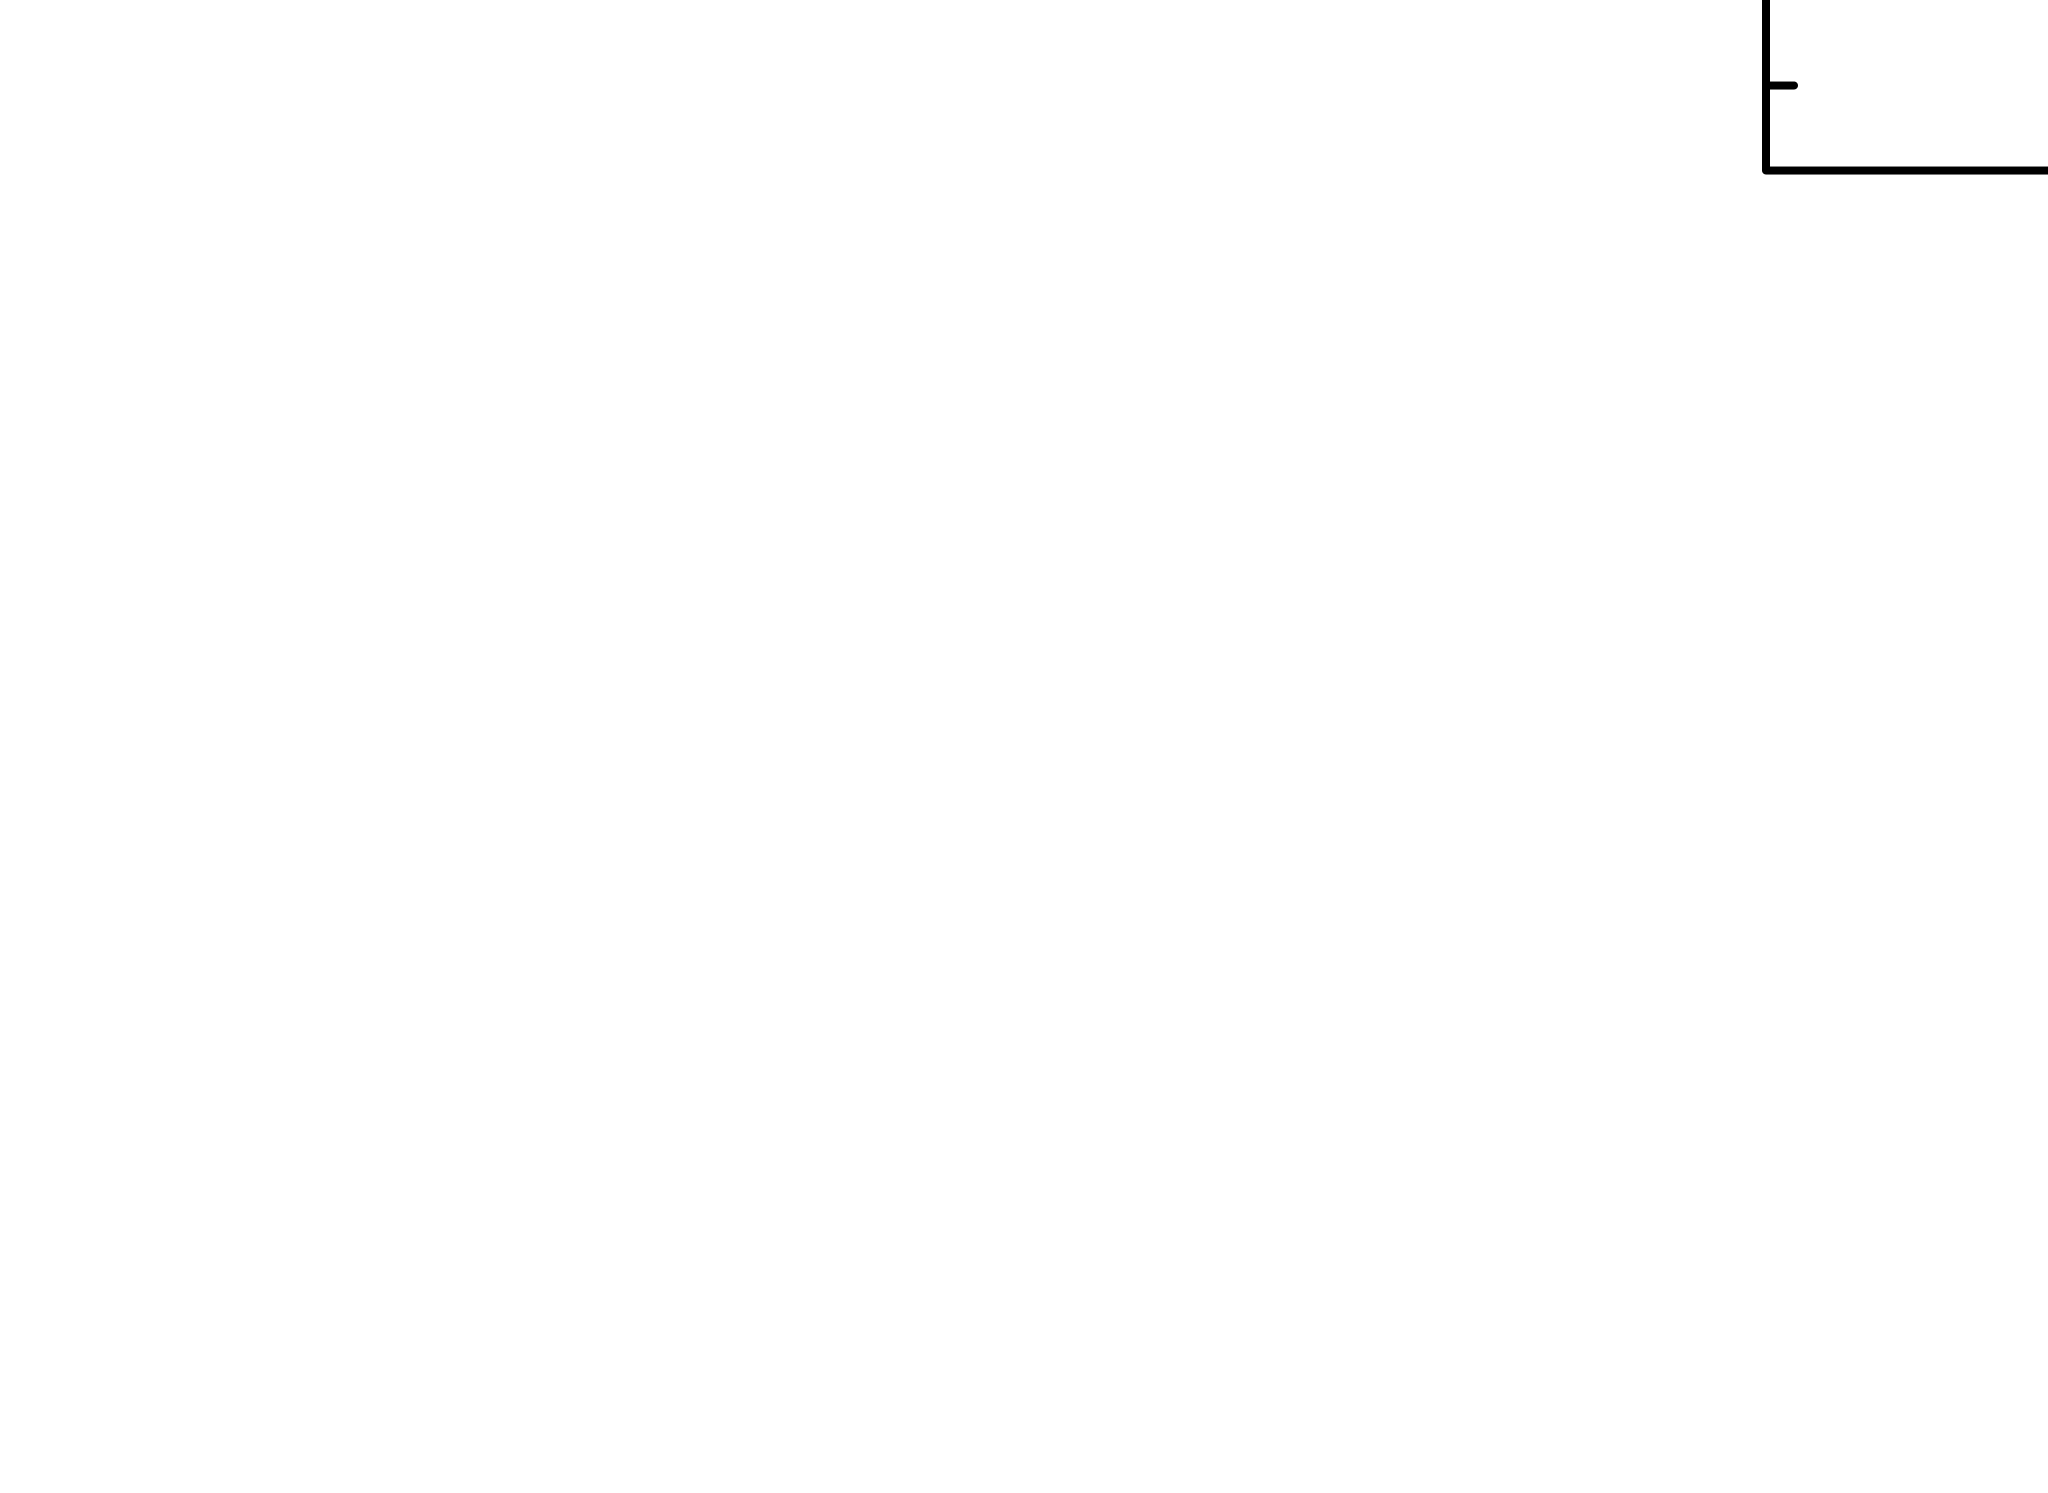

In [8]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*(bbody+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

      No channels ignored (no channels in specified range)
     1 channels (41) ignored in spectrum #     1

Fit statistic  : Chi-Squared                 50.4563     using 40 bins.

Test statistic : Chi-Squared                 50.4563     using 40 bins.
 Null hypothesis probability of 4.3954e-02 with 35 degrees of freedom
 Current data and model not fit yet.


Model TBabs<1>(powerlaw<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
___________________________________________________________

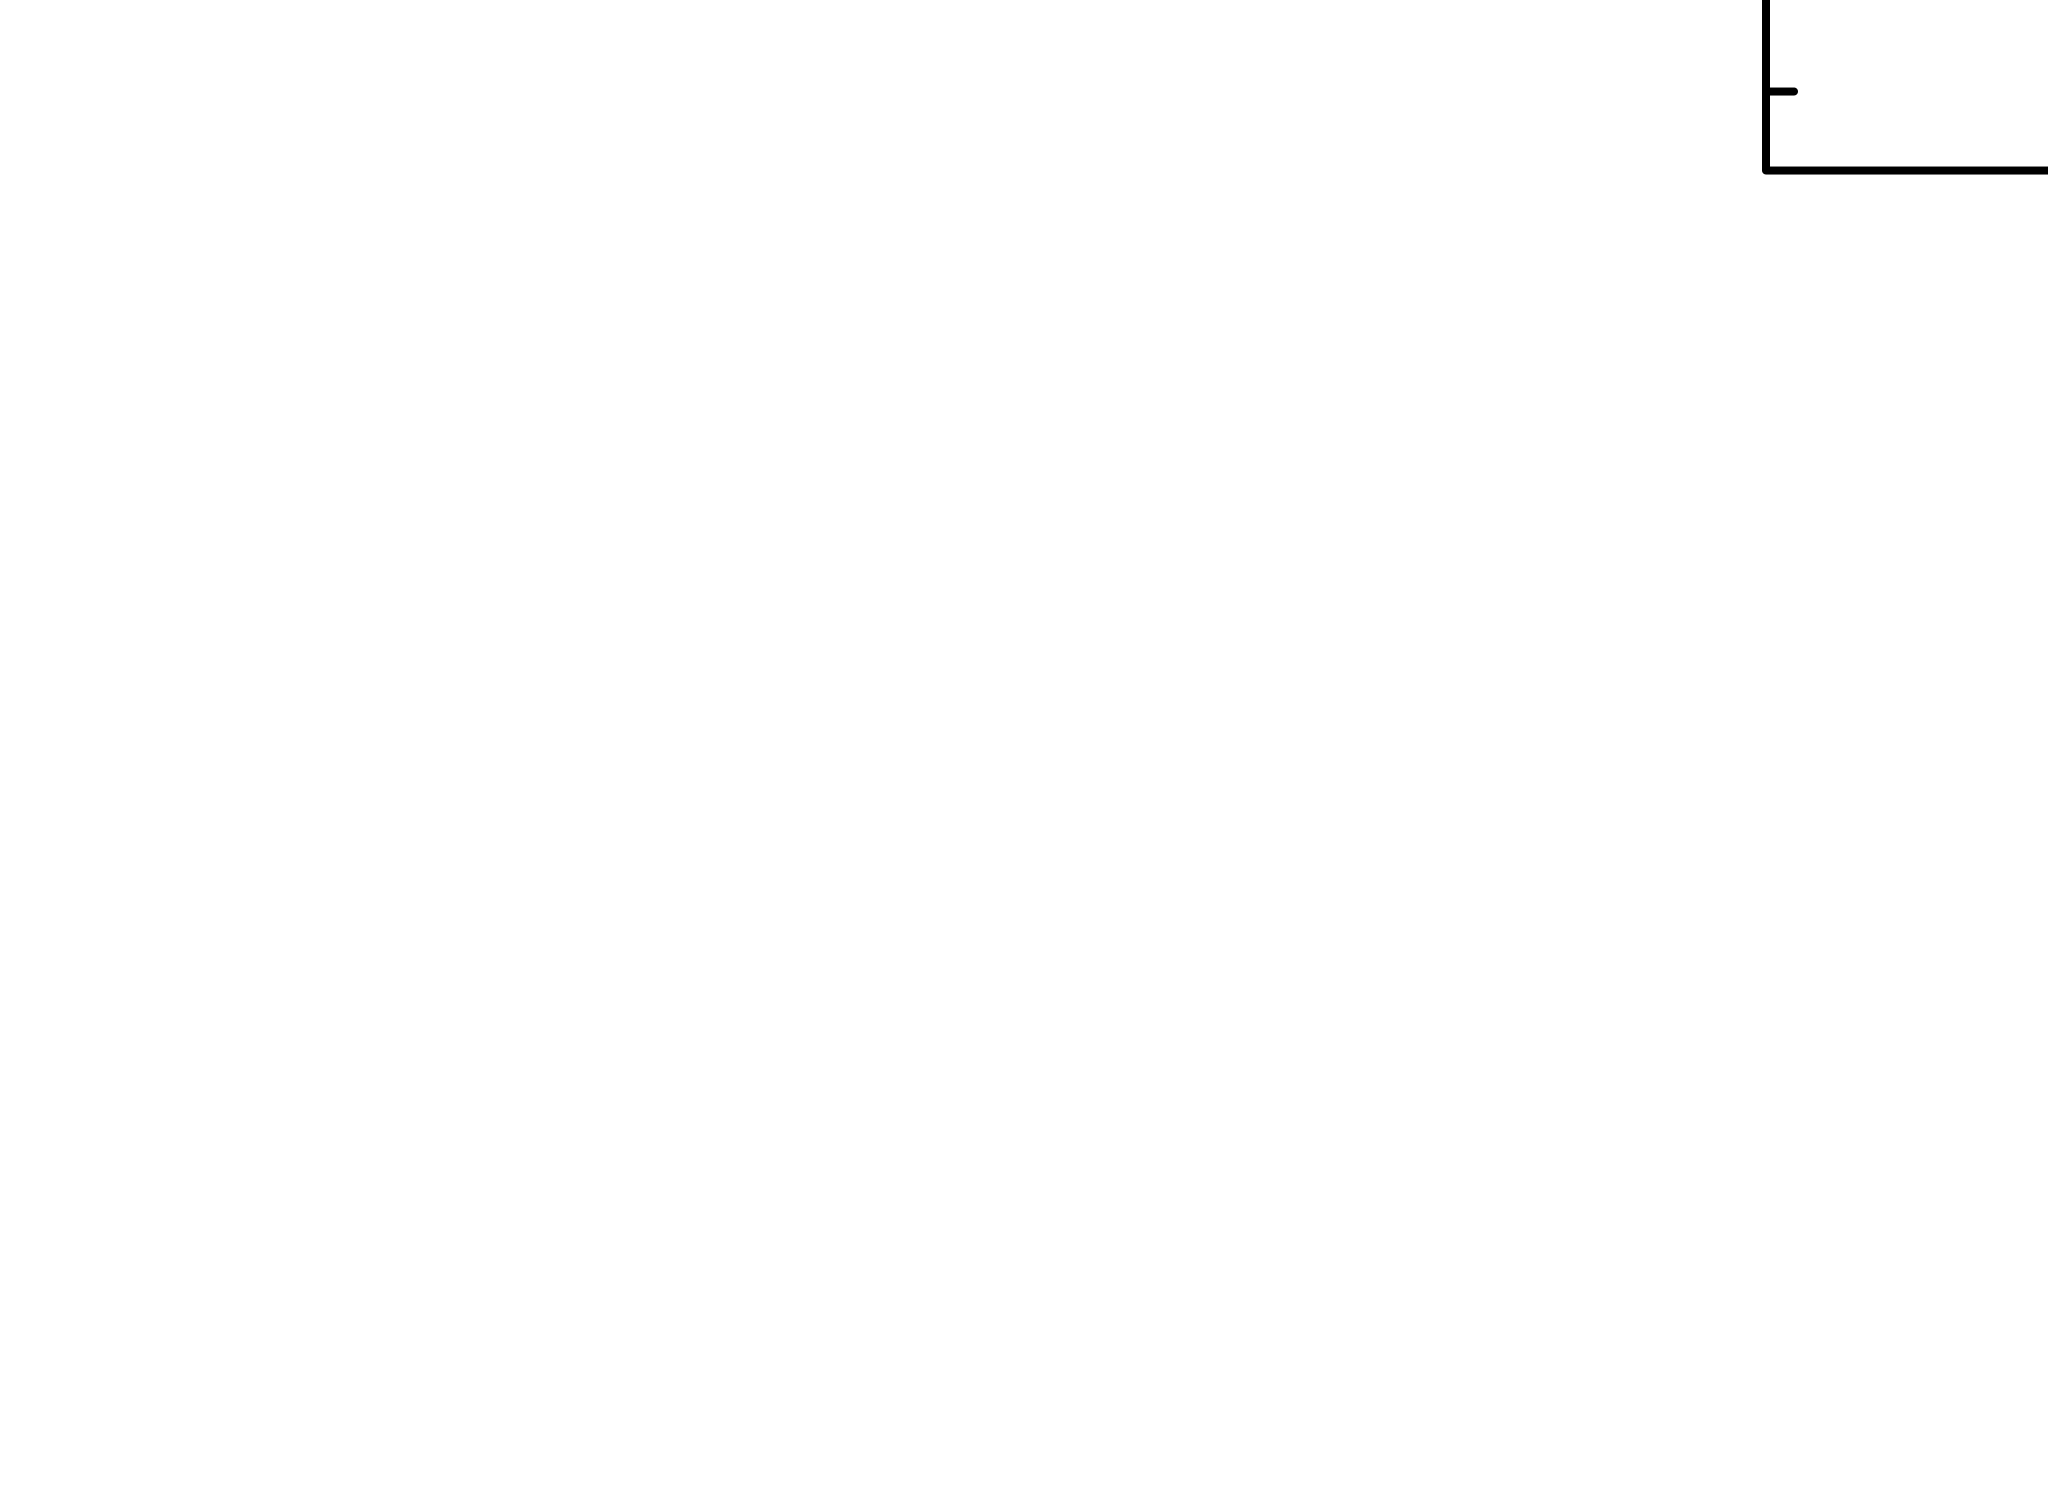

In [9]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*(powerlaw+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

      No channels ignored (no channels in specified range)
     1 channels (41) ignored in spectrum #     1

Fit statistic  : Chi-Squared                 47.7158     using 40 bins.

Test statistic : Chi-Squared                 47.7158     using 40 bins.
 Null hypothesis probability of 7.4277e-02 with 35 degrees of freedom
 Current data and model not fit yet.


Model TBabs<1>(powerlaw<2> + bbody<3> + gaussian<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   bbody      kT         keV      3.00000      +/-  0.0          
   5    3   bbody      norm                1.00000      +/-  0.0          
   6    4   gaussian   LineE      keV      6.50000      +/-  0.0          
   7    4   gaussian   Sigma      keV      0.100

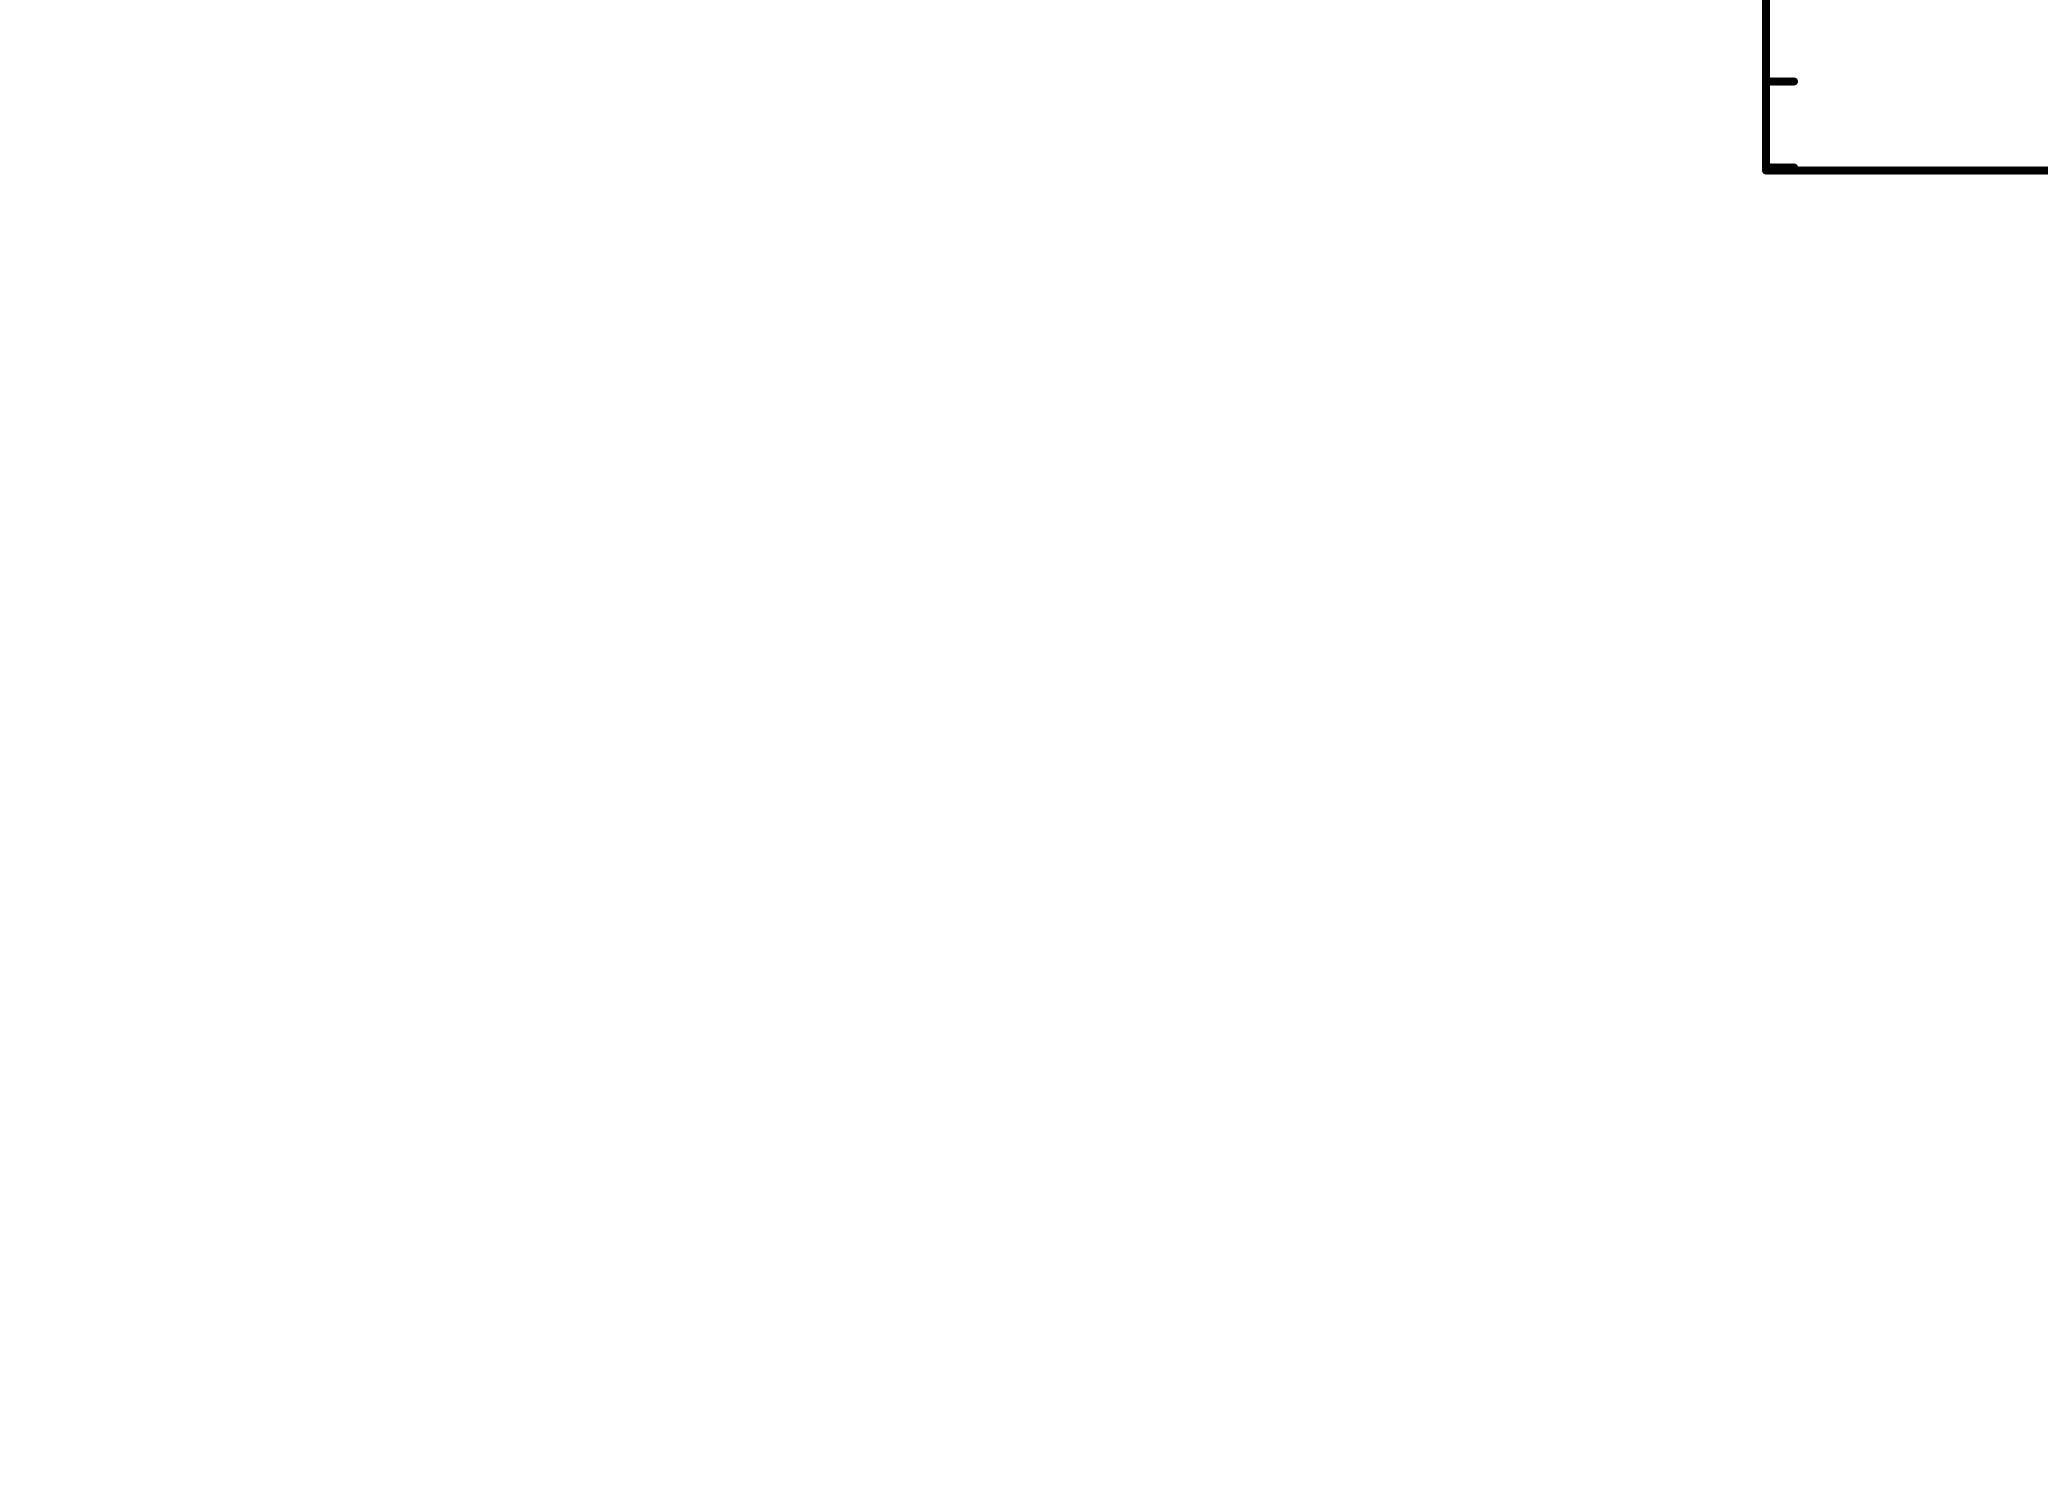

In [10]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*(powerlaw+bbody+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [11]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.00054481 photons (7.034e-12 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [12]:
#plx = 1.4843
d_kpc = 8
F_x = 4.7217*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.614596693110989e+33


In [13]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.78)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  5.119049146085544e-14
F_x / F_opt:  9.223783295010186
